<h1><center><font color='#2C3539'> Estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico </font></center></h1> 

![](ab.jpeg)

[More information](https://www.sciencedirect.com/science/article/pii/S2352340919306985)
| [resources](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition) 



<h1><font color='#2C3539'>Attributes:</font></h1>

* FAVC:     Frequent consumption of high caloric food 
* FCVC:     Frequency of consumption of vegetables
* NCP:      Number of main meals
* CAEC:     Consumption of food between meals 
* CH20:     Consumption of water daily
* CALC:     Consumption of alcohol
* SCC:      Calories consumption monitoring
* FAF:      Physical activity frequency
* TUE:      Time using technology devices
* MTRNS:    Transportation used
* Gender:   Fmale and Male 
* Age:      Age
* Height:   Measured in cm  
* Weight:   Masured in kg
* NObesity: Created with the values of 

    *  <font color='#4863A0'>Insufficient Weight Less than 18.5</font>
    *  <font color='#347235'>Normal Weight from 18.5 to 24.9</font>
    *  <font color='#FFDB58'>Overweight Level I from 25.0 to 27.5 </font>
    *  <font color='#FFDB58'>Overweight Level II from 27.6 to 29.9</font>
    *  <font color='#FBB117'>Obesity Type I  from 30.0 to 34.9 </font>
    *  <font color='#E55451'>Obesity Type II from 35.0 to 39.9 </font>
    *  <font color='#E55451'>Obesity Type III Higher than 40 </font>
    
based on Equation (mass body index = weight / (height * height)) and information from WHO and Mexican Normativity.

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
 
sns.set()

# Set the plot style to a seaborn theme
plt.style.use('fivethirtyeight')

In [13]:
# Load in the Data
df = pd.read_excel("C:/Users/Lenovo/bootcamp/python/week 2/dataset22.xlsx")

print(f"df shape: {df.shape} \n")

df shape: (2111, 17) 



<h1><center><font color='#2C3539'>General information about the data </font></center></h1>

In [14]:
# Get the number of rows and columns
df.shape

(2111, 17)

In [15]:
# Illustrate the missing values in each column
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [16]:
# Get a Series containing counts of Age values
df['Age'].value_counts()

21    236
23    218
26    213
18    212
19    169
22    163
20    150
24     95
25     82
17     69
31     62
30     53
27     43
33     37
38     34
29     33
34     29
32     26
39     25
37     24
41     20
16     20
28     20
40     19
35     19
42      6
44      6
36      6
55      5
43      3
45      3
51      2
46      2
47      1
14      1
15      1
56      1
52      1
48      1
61      1
Name: Age, dtype: int64

In [17]:
# Describe all numerical features
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.426338,2.688299,2.017527,1.007106,0.664614
std,6.357078,0.093368,26.191163,0.584271,0.808984,0.689237,0.895193,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,23.000000,1.700000,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [18]:
# Describe all categorical features
df.describe(exclude="number")

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


<h1><center><font color='#2C3539'>First plot</font></center></h1>


In [32]:
# Get series containing counts of NObeyesdad and Gender values
df.loc[:,["NObeyesdad", "Gender"]].value_counts()

NObeyesdad           Gender
Obesity_Type_III     Female    323
Obesity_Type_II      Male      295
Obesity_Type_I       Male      195
Overweight_Level_II  Male      187
Insufficient_Weight  Female    173
Obesity_Type_I       Female    156
Normal_Weight        Male      146
Overweight_Level_I   Female    145
                     Male      145
Normal_Weight        Female    141
Overweight_Level_II  Female    103
Insufficient_Weight  Male       99
Obesity_Type_II      Female      2
Obesity_Type_III     Male        1
dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.5% of the p

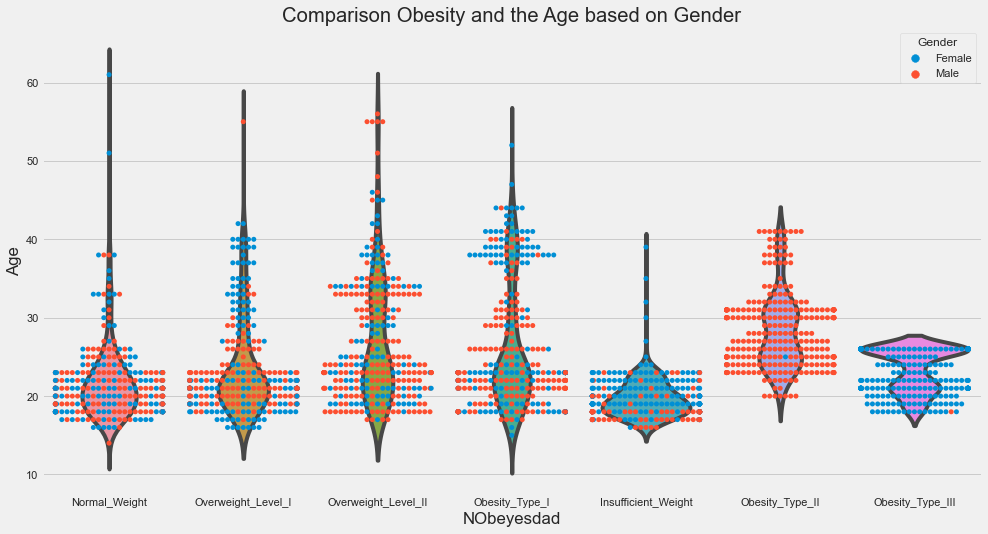

In [34]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x="NObeyesdad", y="Age", data=df, inner=None)
ax = sns.swarmplot(x="NObeyesdad", y="Age", data=df,hue="Gender")

plt.title("Comparison Obesity and the Age based on Gender");

<h2><font color='#2C3539'> Insights </font></h2>
<ul>
    <li> Most of the people who participate in this survey in age range between 18 to early 40's</li> 
    <li> People with opesity type 3 most of them are women with age range between 18 and young than 30</li>
    <li> People with opesity type 2 most of them are men with age range between 20 and early 40's </li>
</ul>

<h1><center><font color='#2C3539'>Second plot</font></center></h1>


In [35]:
# Value_counts for NObeyesdad and MTRANS
df.loc[:,["NObeyesdad", "MTRANS"]].value_counts()

NObeyesdad           MTRANS               
Obesity_Type_III     Public_Transportation    323
Obesity_Type_I       Public_Transportation    236
Insufficient_Weight  Public_Transportation    220
Overweight_Level_I   Public_Transportation    212
Normal_Weight        Public_Transportation    200
Obesity_Type_II      Public_Transportation    200
Overweight_Level_II  Public_Transportation    189
Obesity_Type_I       Automobile               110
Obesity_Type_II      Automobile                95
Overweight_Level_II  Automobile                94
Overweight_Level_I   Automobile                66
Insufficient_Weight  Automobile                46
Normal_Weight        Automobile                45
                     Walking                   32
Overweight_Level_I   Walking                    9
Overweight_Level_II  Walking                    6
Normal_Weight        Motorbike                  6
Insufficient_Weight  Walking                    6
Normal_Weight        Bike                       4
Obesity

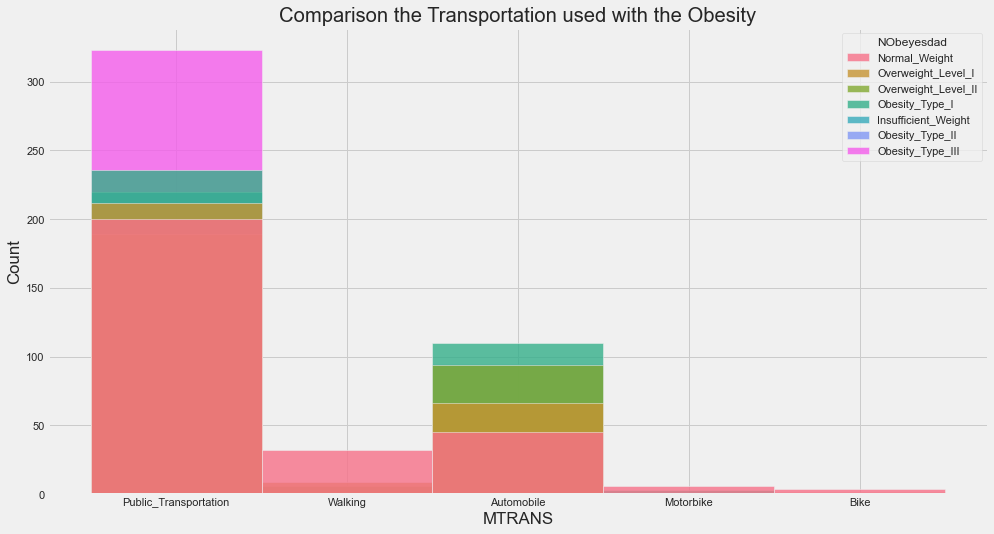

In [38]:
plt.figure(figsize=(15,8))
sns.histplot(
    df,
    x="MTRANS",
    hue="NObeyesdad",
    alpha=0.8,
)

plt.title("Comparison the Transportation used with the Obesity");

<h2><font color='#2C3539'> Insights </font></h2>
<ul>
    <li> People with normal weight and under weight are the only who walks, bike and use motorbike as transportation method</li> 
    <li> We can not count the using of the Public transportation, or the Automobile as an effective reason of declaring the Obesity level </li>
</ul>

------ because it doesn't count the amount of walk

<h1><center><font color='#2C3539'>Third plot</font></center></h1>


In [40]:
# Value_counts for family_history_with_overweight
df["family_history_with_overweight"].value_counts()

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

<Figure size 1080x576 with 0 Axes>

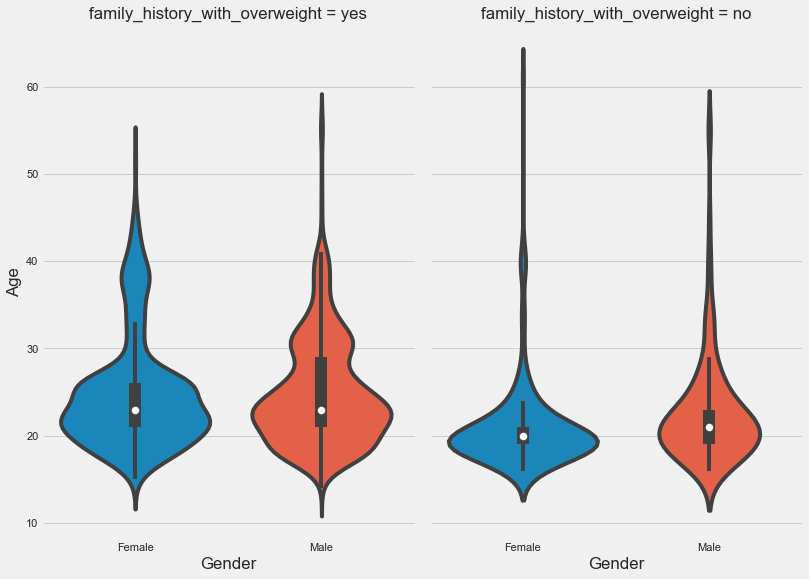

In [42]:
#Violin plot comparing the Family history with overweight based on the age and gender

plt.figure(figsize=(15,8))
sns.catplot(x="Gender", y="Age",
                col="family_history_with_overweight",
                data=df, kind="violin", split=True,
                height=8, aspect=.7);




<h2><font color='#2C3539'> Insights </font></h2>
<ul>
    <li> Men with family hestory spreads </li> 
    <li> We can not count the using of the Public transportation, or the Automobile as an effective reason of declaring the Obesity level </li>
</ul>



<h1><center><font color='#2C3539'>Fourth plot</font></center></h1>


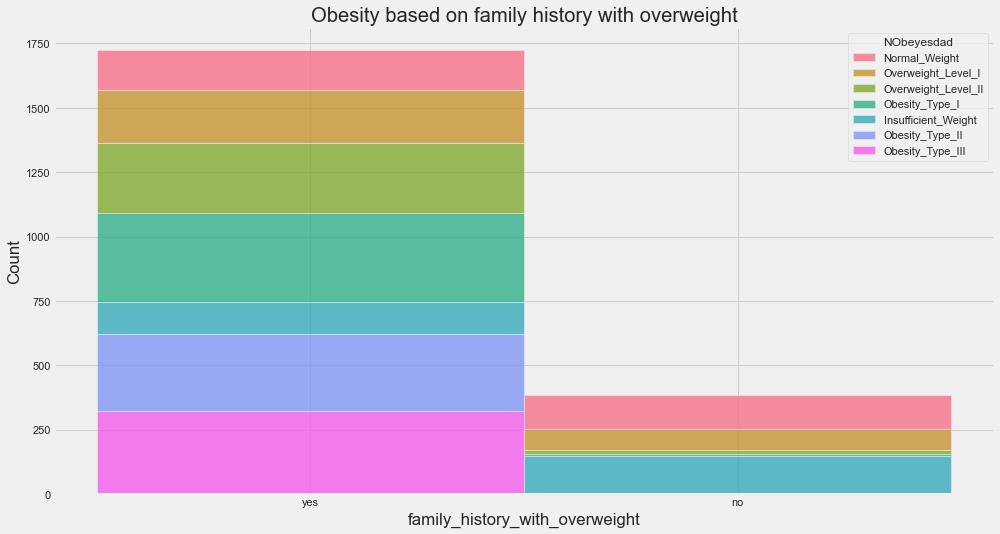

In [62]:
plt.figure(figsize=(15,8))
sns.histplot(
    df,
    x="family_history_with_overweight",
    hue="NObeyesdad",
    multiple="stack",
    alpha=0.8
)
plt.title("Obesity based on family history with overweight");

<h2><font color='#2C3539'> Insights </font></h2>
<ul>
    <li> People with family history with overweight have the high obesity levels </li> 
    <li> People with no family history with overweight have low obesity levels </li>
</ul>

<h1><center><font color='#2C3539'>Fifth plot</font></center></h1>

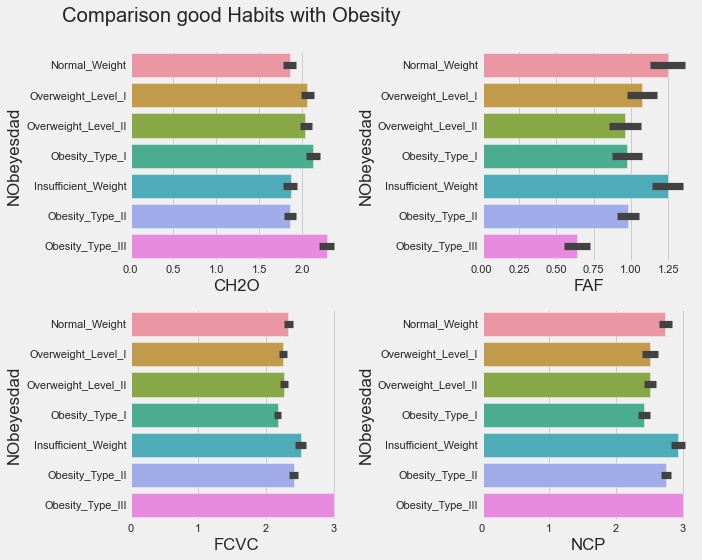

In [55]:

plt.figure(figsize=(10,8))

#plot 1:
plt.subplot(2, 2, 1) # 2x2 plot with plot position 1 (upper left)
sns.barplot(
    y="NObeyesdad", 
    x="CH2O",#Consumption of water daily 
    data=df
)


#plot 2:
plt.title("Comparison good Habits with Obesity  \n");
plt.subplot(2, 2, 2) # 2x2 plot with plot position 2 (upper right)
sns.barplot(
    y="NObeyesdad", 
    x="FAF",# 
    data=df
)


# plot 3:
plt.subplot(2,2,3) # 2x2 plot with plot position 2 (lower left)
sns.barplot(
    y="NObeyesdad", 
    x="FCVC",#Frequency of consumption of vegetables
    data=df
)
# plot 4:

plt.subplot(2,2,4) # 2x2 plot with plot position 2 (lower right)
sns.barplot(
    y="NObeyesdad", 
    x="NCP",#Consumption of food between meals
    data=df
) 

plt.tight_layout() 
plt.show()




<h1><center><font color='#2C3539'>Sixth plot</font></center></h1>

In [44]:
# Grouping the age to (Youth (15-24), Adults(25-64),seniors(65-90))

Age_group = df
bins= [15,24,46,60]
labels = ['Youth','Adults','Seniors']
Age_group['AgeGroup'] = pd.cut(Age_group["Age"], bins=bins, labels=labels, right=False)
df["AgeGroup"].value_counts()

Youth      1238
Adults      858
Seniors      13
Name: AgeGroup, dtype: int64

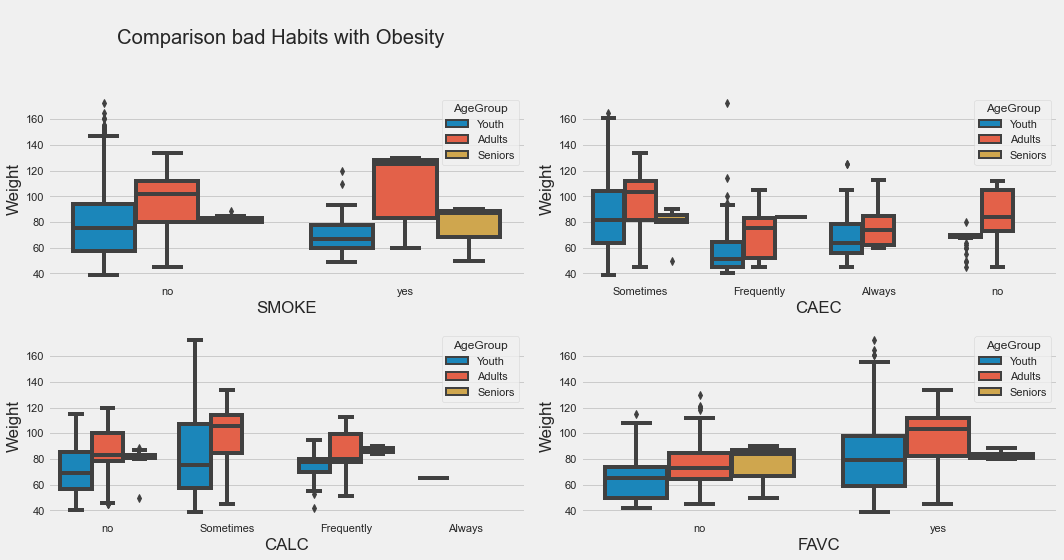

In [57]:
plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
sns.boxplot(
    x="SMOKE", 
    y="Weight", 
    hue="AgeGroup",  
    data=df
)
plt.title("\nComparison bad Habits with Obesity  \n\n");
plt.subplot(2, 2, 2)
sns.boxplot(
    x="CAEC", 
    y="Weight", 
    hue="AgeGroup",  
    data=df
)
plt.subplot(2, 2, 3)
sns.boxplot(
    x="CALC", 
    y="Weight", 
    hue="AgeGroup",  
    data=df
)

plt.subplot(2, 2, 4)
sns.boxplot(
    x="FAVC", 
    y="Weight", 
    hue="AgeGroup",  
    data=df
)

plt.tight_layout() 
plt.show()
